In [72]:
import numpy as np
import pandas as pd


In [73]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [ ]:
# 1. Data Cleaning
# 2. EDA    
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements acc to the Evaluation
# 7. Website
# 8. Deploy

In [75]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN
1491,spam,Your account has been credited with 500 FREE T...,NaN,NaN,NaN
507,ham,You should know now. So how's anthony. Are you...,NaN,NaN,NaN
552,ham,"Sure, if I get an acknowledgement from you tha...",NaN,NaN,NaN
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...,NaN,NaN,NaN


In [76]:
df.shape

(5572, 5)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [78]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [79]:
df.sample(5)

,v1,v2
3750,ham,"Haha... Sounds crazy, dunno can tahan anot..."
4094,ham,I ain't answerin no phone at what is actually ...
4871,ham,Hi dis is yijue i would be happy to work wif Ì...
5503,ham,Perhaps * is much easy give your account ident...
4831,ham,Rats. Hey did u ever vote for the next themes?


In [80]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2844,ham,Will be out of class in a few hours. Sorry
2529,ham,Can you just come in for a sec? There's somebo...
3962,ham,If you ask her or she say any please message.
2517,ham,"Sorry, I'll call later"
4557,ham,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...


In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [82]:
df['target'] = encoder.fit_transform(df['target'])

In [83]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [85]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [86]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.shape

(5169, 2)

In [89]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

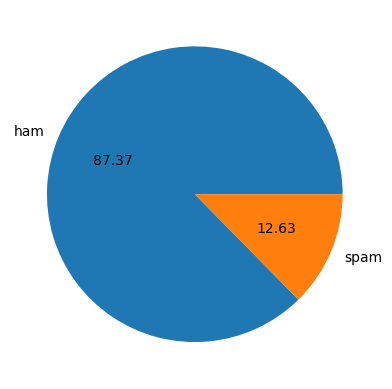

In [91]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [92]:
import nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
df['num_characters'] = df['text'].apply(len)

In [95]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [97]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [98]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [99]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [102]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

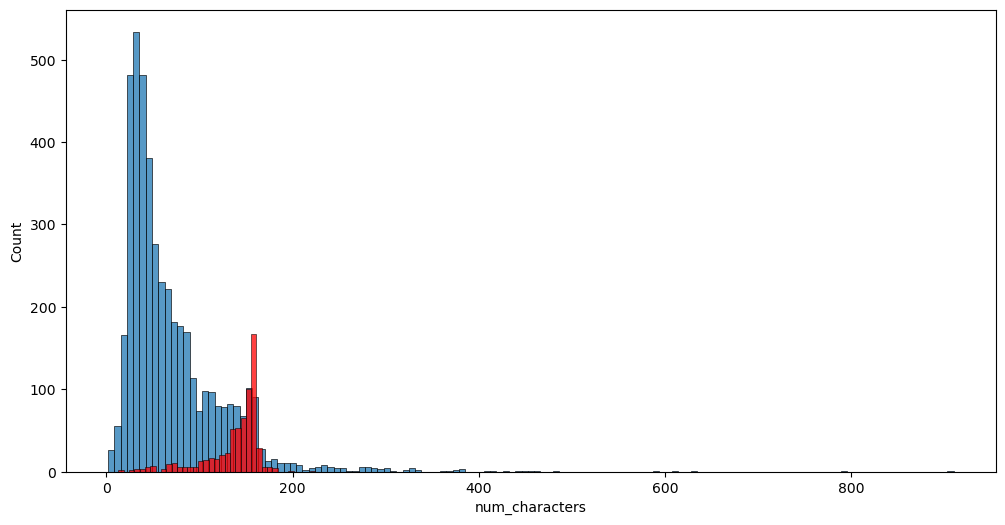

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

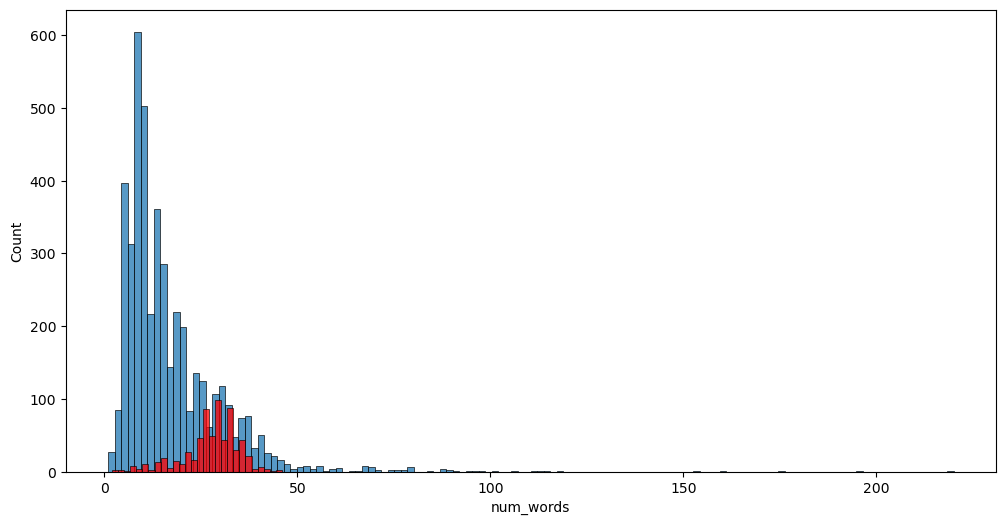

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

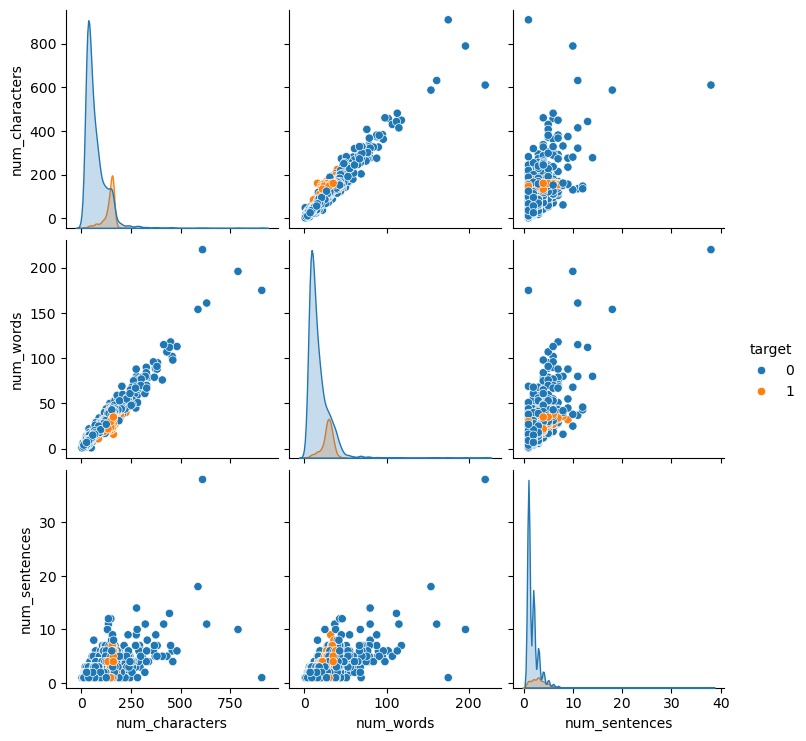

In [105]:
sns.pairplot(df,hue='target')

<Axes: >

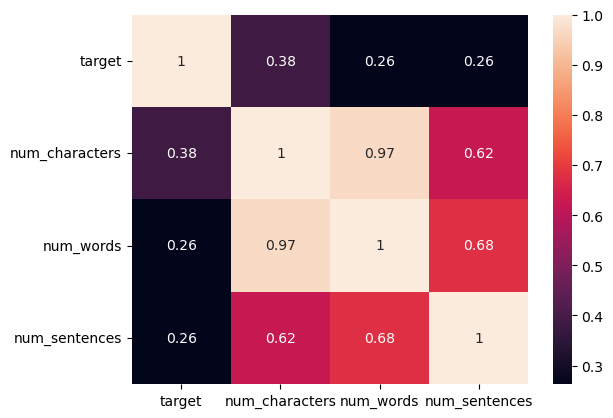

In [107]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [111]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords & punctuation
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)


In [112]:
transform_text(
    "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [113]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [114]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [115]:
df['transformed_text'] = df['text'].apply(transform_text)

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [120]:
!pip install wordcloud


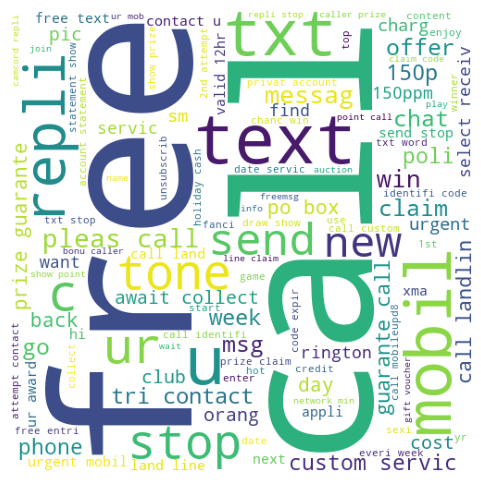

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'
)

spam_wc = wc.generate(
    df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
)

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()



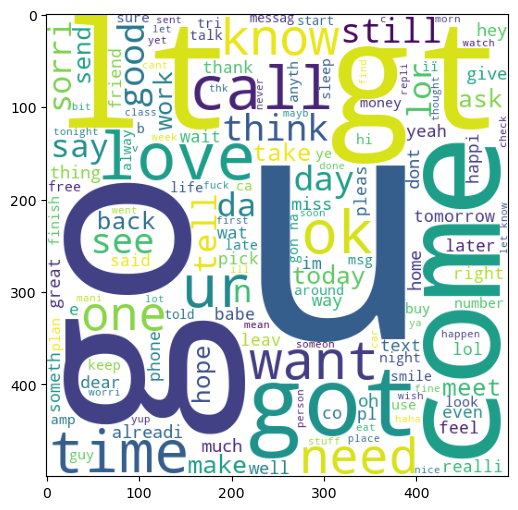

In [122]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [125]:
len(spam_corpus)

9939

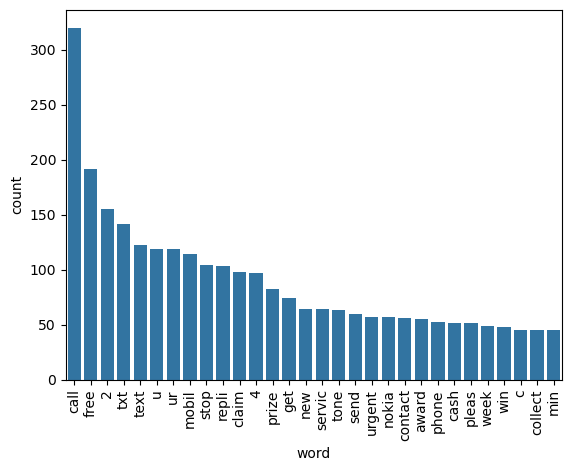

In [127]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=90)
plt.show()



In [128]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [129]:
len(ham_corpus)

35404

In [130]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given